# Proyek Analisis Data: Nama dataset
- Nama: Fahri Putra Herlambang
- Email: fahriputra000@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari variabel cuaca seperti temperatur, kelembaban, dan kondisi cuaca terhadap jumlah penyewaan sepeda?
- Berapa perubahan dalam jumlah penyewaan sepeda berdasarkan musim (springer, summer, fall, winter) dari tahun 2011 ke tahun 2012?

## Menyaipkan semua library yang dibuthkan

In [31]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
hourly_data = pd.read_csv('./Dataset/hour.csv')
daily_data = pd.read_csv('./Dataset/day.csv')


### Assessing Data

In [33]:
# Information about Hourly Data
print('Hourly Data Characteristics')
print('Number of Rows:', hourly_data.shape[0])
print('Number of Columns:', hourly_data.shape[1])

Hourly Data Characteristics
Number of Rows: 17379
Number of Columns: 17


In [34]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
# Information about Hourly Data
print('Hourly Data Characteristics')
print('Number of Rows:', daily_data.shape[0])
print('Number of Columns:', daily_data.shape[1])

Hourly Data Characteristics
Number of Rows: 731
Number of Columns: 16


In [36]:
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

In [56]:
print('Hourly Data:', hourly_data.isnull().sum())

Hourly Data: dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [57]:
print('Daily Data:', daily_data.isnull().sum())

Daily Data: dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [37]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday']).dt.strftime('%Y-%m-%d')
daily_data['dteday'] = pd.to_datetime(daily_data['dteday']).dt.strftime('%Y-%m-%d')

In [38]:
hourly_data = hourly_data.drop(['instant', 'atemp'], axis=1)
daily_data = daily_data.drop(['instant', 'atemp'], axis=1)

Hourly Data


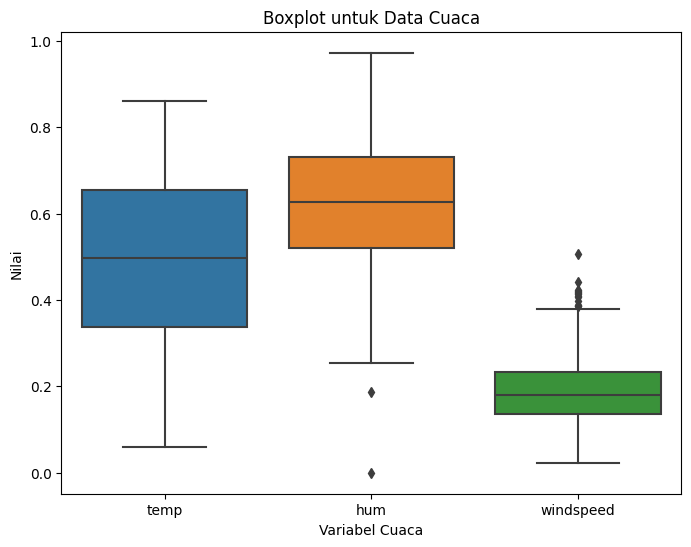

In [39]:
print('Hourly Data')
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

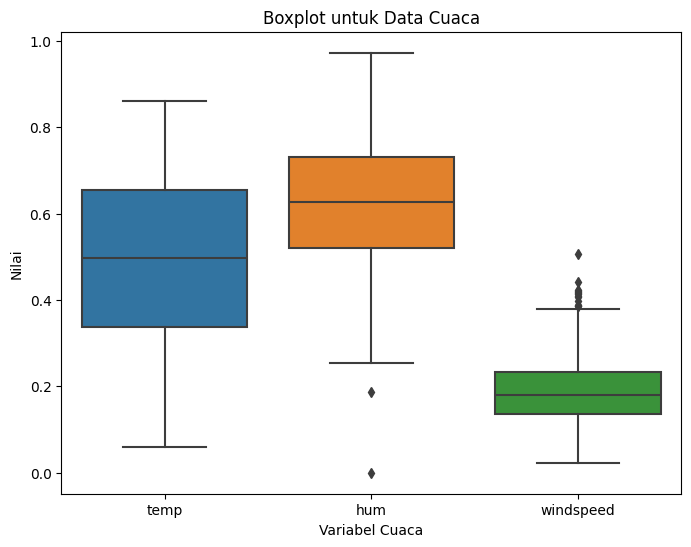

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

In [41]:
# Calculate IQR
Q1 = hourly_data['hum'].quantile(0.25)
Q3 = hourly_data['hum'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
hourly_data = hourly_data[(hourly_data['hum'] >= lower_bound) & (hourly_data['hum'] <= upper_bound)]
daily_data = daily_data[(daily_data['hum'] >= lower_bound) & (daily_data['hum'] <= upper_bound)]

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
# Information about Hourly Data
print('Hourly Data Characteristics')
print('Number of Rows:', hourly_data.shape[0])
print('Number of Columns:', hourly_data.shape[1])

Hourly Data Characteristics
Number of Rows: 17357
Number of Columns: 15


In [43]:
print('Data Types of Columns')
print(hourly_data.dtypes)

Data Types of Columns
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [47]:
print('Summary of Columns')
hourly_data.describe(include='all')

Summary of Columns


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.628024,0.190007,35.718788,153.948551,189.667339
std,NaN,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.191754,0.122342,49.321693,151.382189,181.409297
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,17.000000,116.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000


Hourly Data


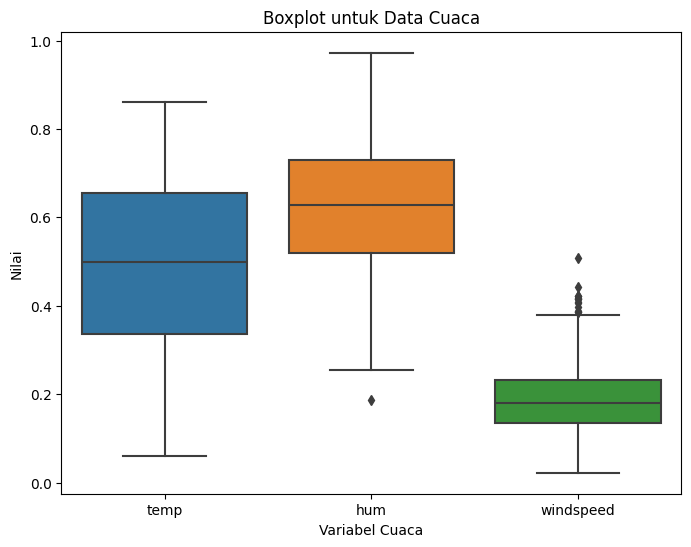

In [49]:
print('Hourly Data')
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

In [50]:
# Information about daily Data
print('Daily Data Characteristics')
print('Number of Rows:', daily_data.shape[0])
print('Number of Columns:', daily_data.shape[1])

Daily Data Characteristics
Number of Rows: 730
Number of Columns: 14


In [51]:
print('Data Types of Columns')
print(daily_data.dtypes)

Data Types of Columns
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [55]:
print('Summary of Columns')
daily_data.describe(include='all')

Summary of Columns


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.628754,0.190388,849.275342,3660.390411,4509.665753
std,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.140614,0.077506,686.449738,1557.149836,1933.194931
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.187917,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.730313,0.233207,1096.500000,4783.250000,5966.000000


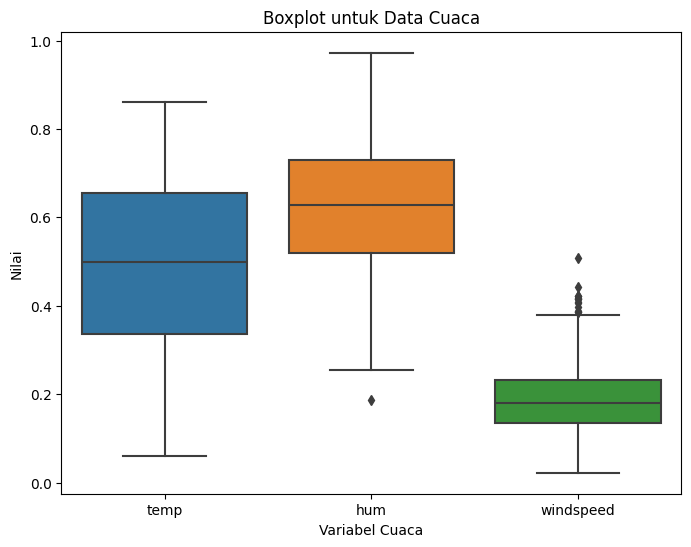

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh dari variabel cuaca seperti temperatur, kelembaban, dan kondisi cuaca terhadap jumlah penyewaan sepeda?

hourly data

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=hourly_data, x='hum', y='temp', size='cnt', hue='weathersit', palette='viridis', sizes=(20, 200))
plt.title('Pengaruh Variabel Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Weather Situation')
plt.show()


daily data

In [ ]:
plt.figure(figsize=(10, 8))
    sns.scatterplot(data=daily_data, x='hum', y='temp', size='cnt', hue='weathersit', palette='viridis', sizes=(20, 200))
    plt.title('Pengaruh Variabel Cuaca terhadap Jumlah Penyewaan Sepeda')
    plt.xlabel('Humidity')
    plt.ylabel('Temperature')
    plt.legend(title='Weather Situation')
    plt.show()

### Pertanyaan 2:
Berapa perubahan dalam jumlah penyewaan sepeda berdasarkan musim (springer, summer, fall, winter) dari tahun 2011 ke tahun 2012

#### hourly data

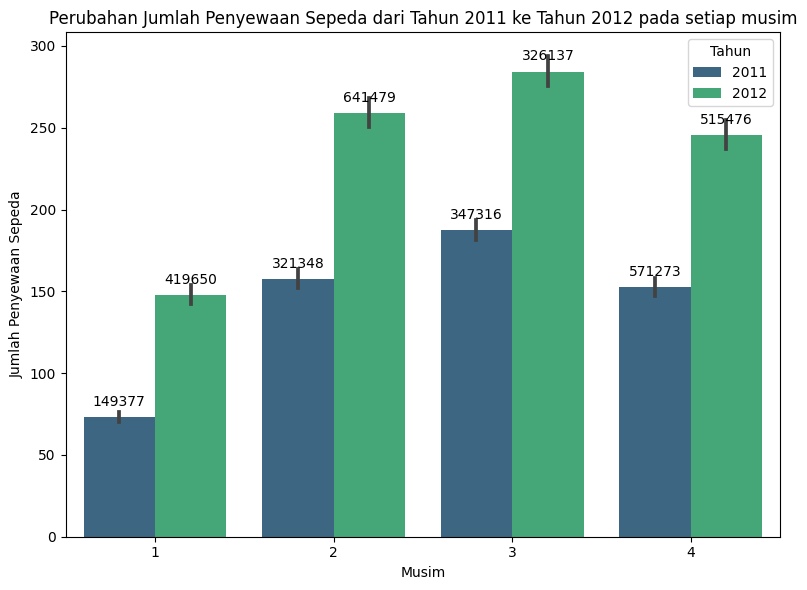

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=hourly_data, x='season', y='cnt', hue='yr', palette='viridis')
plt.title('Perubahan Jumlah Penyewaan Sepeda dari Tahun 2011 ke Tahun 2012 pada setiap musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2011', '2012'], title='Tahun')
#add value labels
rects = ax.patches
labels = hourly_data.groupby(['season', 'yr'])['cnt'].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

#### Daily Data

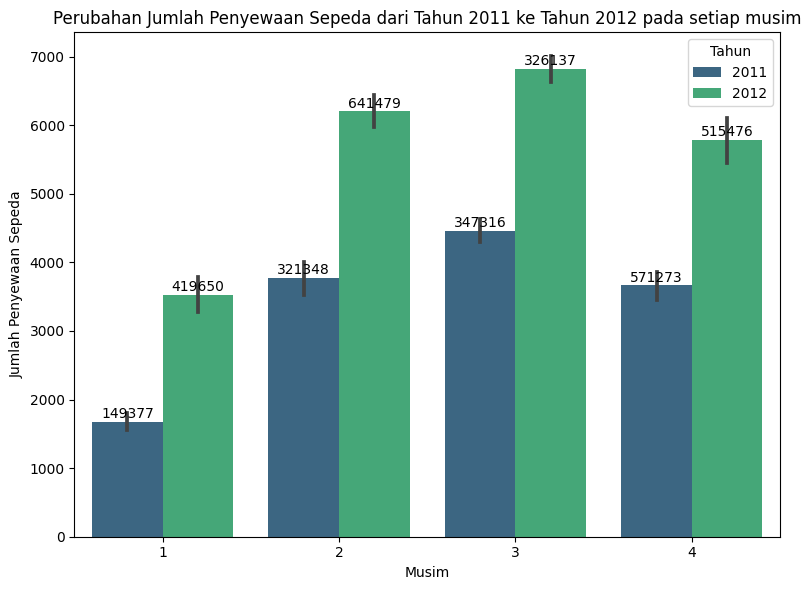

In [59]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=daily_data, x='season', y='cnt', hue='yr', palette='viridis')
plt.title('Perubahan Jumlah Penyewaan Sepeda dari Tahun 2011 ke Tahun 2012 pada setiap musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2011', '2012'], title='Tahun')
#add value labels
rects = ax.patches
labels = daily_data.groupby(['season', 'yr'])['cnt'].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2